In [31]:
import tensorflow as tf
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

#data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [73]:
#Hyper parameters
learning_rate = 0.0005
epochs = 50
batch_size = 250
display_step = 1 

In [74]:
#NN parameters 
n_hidden_1 = 16
n_hidden_2 = 16 
image_size = 28*28
labels_size = 10

In [75]:
# Define placeholders for input data
training_data = tf.placeholder(tf.float32, [None, image_size])
labels = tf.placeholder(tf.float32, [None, labels_size])

In [76]:
#weigths and biases
weights = {
    'h1': tf.Variable(tf.truncated_normal([image_size,n_hidden_1],stddev=0.1)),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1  ,n_hidden_2],stddev=0.1)),
    'out': tf. Variable(tf.truncated_normal([n_hidden_2,labels_size],stddev=0.1))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([labels_size]))
}

In [83]:
def multilayer_perceptron(x):
    l_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    y_1 = tf.nn.sigmoid(l_1)
    l_2 = tf.add(tf.matmul(y_1,weights['h2']),biases['b2'])
    y_2 = tf.nn.sigmoid(l_2)
    out_l = tf.add(tf.matmul(y_2,weights['out']),biases['out'])
    return(out_l)

In [84]:
#define model
logits = multilayer_perceptron(training_data)

#Cost function
costf = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=labels))
#optimizer
opt = tf.train.AdamOptimizer(learning_rate)
train_opt = opt.minimize(costf)

In [85]:
# Initializing the variables
init = tf.global_variables_initializer()
# Run a tensorflow Session
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [86]:
avg_cost_list = []
for e in range(epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples/batch_size)
    for i in range(total_batch):
        input_batch, labels_batch = mnist.train.next_batch(batch_size)
        _,c = sess.run([train_opt,costf],feed_dict = {training_data: input_batch, labels: labels_batch})
        avg_cost += c/total_batch
    avg_cost_list.append(avg_cost)
    if e % display_step == 0:
        print('Epoch: ' + str(e+1), 'cost: ' + str(avg_cost))
print('Training done!')

Epoch: 1 cost: 2.35839901621
Epoch: 2 cost: 2.11338246411
Epoch: 3 cost: 1.88359163241
Epoch: 4 cost: 1.65033289844
Epoch: 5 cost: 1.48120051948
Epoch: 6 cost: 1.3703504389
Epoch: 7 cost: 1.28350685672
Epoch: 8 cost: 1.20421559594
Epoch: 9 cost: 1.13083430962
Epoch: 10 cost: 1.06221432361
Epoch: 11 cost: 0.982284856655
Epoch: 12 cost: 0.891200112755
Epoch: 13 cost: 0.804946299846
Epoch: 14 cost: 0.719006406448
Epoch: 15 cost: 0.639882650159
Epoch: 16 cost: 0.574182372066
Epoch: 17 cost: 0.519935302707
Epoch: 18 cost: 0.479017619924
Epoch: 19 cost: 0.445502617007
Epoch: 20 cost: 0.420132093267
Epoch: 21 cost: 0.397388079221
Epoch: 22 cost: 0.379031500898
Epoch: 23 cost: 0.366208740121
Epoch: 24 cost: 0.353128032048
Epoch: 25 cost: 0.335981050879
Epoch: 26 cost: 0.334333974258
Epoch: 27 cost: 0.319638117064
Epoch: 28 cost: 0.311789769679
Epoch: 29 cost: 0.300082190199
Epoch: 30 cost: 0.296099328046
Epoch: 31 cost: 0.292377720299
Epoch: 32 cost: 0.283469124003
Epoch: 33 cost: 0.2742908090

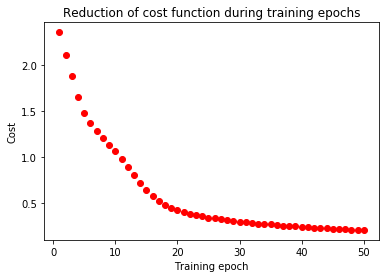

In [87]:
plot([(i+1) for i in range(epochs)],avg_cost_list,'ro')
title('Reduction of cost function during training epochs')
ylabel('Cost')
xlabel('Training epoch')
show()

In [88]:
# Test model
pred = tf.nn.softmax(logits)  # Apply softmax to logits
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(labels, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
print("Accuracy:", accuracy.eval({training_data: mnist.test.images, labels: mnist.test.labels}))

Accuracy: 0.9331
